Finding the best performing genres, top languages, and top directors. This section is combining all relevant data.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [2]:
#connect to im.db
conn = sqlite3.connect('dsc-phase-1-project-v2-4-master/zippedData/im.db')

#pull tables directors, movie_akas, movie_basics, movie_ratings into pandas DataFrames
im_directors_df = pd.read_sql("SELECT * FROM directors;", conn)
im_akas_df = pd.read_sql("SELECT * FROM movie_akas;", conn)
im_basics_df = pd.read_sql("SELECT * FROM movie_basics;", conn)
im_ratings_df = pd.read_sql("SELECT * FROM movie_ratings;", conn)
conn.close()

In [3]:
#pull tn.movie_budgets.csv into DataFrame
tn_budgets_df = pd.read_csv('dsc-phase-1-project-v2-4-master/zippedData/tn.movie_budgets.csv')

In [4]:
# budget and gross are str, convert to numeric without '$' or ','
tn_budgets_df['worldwide_gross'] = pd.to_numeric(tn_budgets_df['worldwide_gross'].str.replace('$','').str.replace(',',''))
tn_budgets_df['production_budget'] = pd.to_numeric(tn_budgets_df['production_budget'].str.replace('$','').str.replace(',',''))
tn_budgets_df['domestic_gross'] = pd.to_numeric(tn_budgets_df['domestic_gross'].str.replace('$','').str.replace(',',''))

#add column for total profit
tn_budgets_df['profit'] = tn_budgets_df['worldwide_gross'] - tn_budgets_df['production_budget']

In [5]:
#merge from im.db: from movie_akas: title, language
#from movie_basics: genres
#from movie_ratings: averagerating, person_id from directors
#all on movie_id
merged_im_df = pd.merge(im_akas_df[['movie_id', 'title', 'language']], im_ratings_df[['movie_id', 'averagerating']], on = 'movie_id', how = 'inner')
merged_im_df = pd.merge(merged_im_df, im_basics_df[['movie_id', 'genres']], on = 'movie_id', how = 'inner')
merged_im_df = pd.merge(merged_im_df, im_directors_df[['movie_id', 'person_id']], on = 'movie_id', how = 'inner')
merged_im_df = merged_im_df.drop_duplicates()

In [6]:
#rename 'movie' to 'title' in tn_budgets_df in preperation for merging data
tn_budgets_df = tn_budgets_df.rename(columns = {'movie':'title'})

In [7]:
#add rating and genres to budget data, sorted by profit
mon_rat_gen = tn_budgets_df.merge(merged_im_df, on='title', how='left')
mon_rat_gen = mon_rat_gen.sort_values(by='profit', ascending = False)

Now find the top genres by profit.

In [8]:
#create dataframe for profit v genre
prof_gen = mon_rat_gen.drop_duplicates(subset=['movie_id'])[['genres', 'profit']]

In [9]:
#seperate and stack genres, then find mean profits and sort by profit
prof_gen = prof_gen.join(prof_gen.pop('genres').str.split(',', expand = True).stack().reset_index(level=1, drop=True).rename('genres'))
prof_gen_mean = prof_gen.groupby(['genres']).mean()
prof_gen_mean = prof_gen_mean.sort_values(by='profit', ascending = False)
prof_gen_median = prof_gen.groupby(['genres']).median()
prof_gen_median = prof_gen_median.sort_values(by='profit', ascending = False)

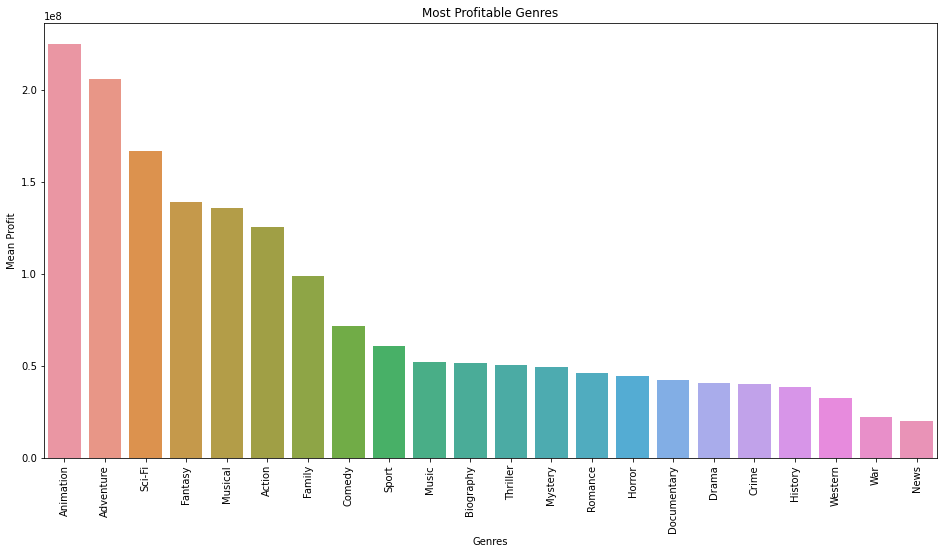

In [10]:
#visualize mean profit by genre
plt.figure(figsize = (16, 8))
sns.barplot(x = prof_gen_mean.index, y = prof_gen_mean['profit'])
plt.xlabel('Genres')
plt.ylabel('Mean Profit')
plt.title('Most Profitable Genres')
plt.xticks(rotation = 90)
plt.show()

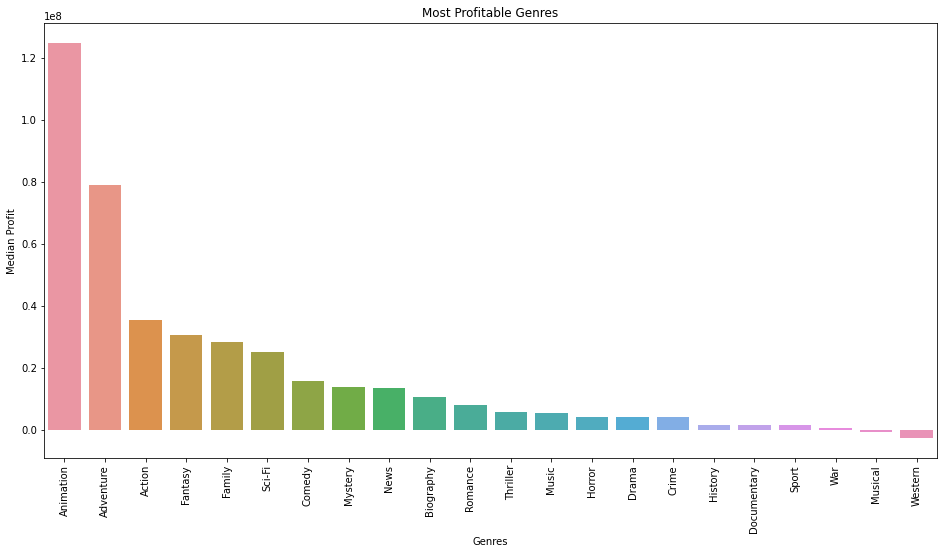

In [11]:
#visualize median profit by genre
plt.figure(figsize = (16, 8))
sns.barplot(x = prof_gen_median.index, y = prof_gen_median['profit'])
plt.xlabel('Genres')
plt.ylabel('Median Profit')
plt.title('Most Profitable Genres')
plt.xticks(rotation = 90)
plt.show()

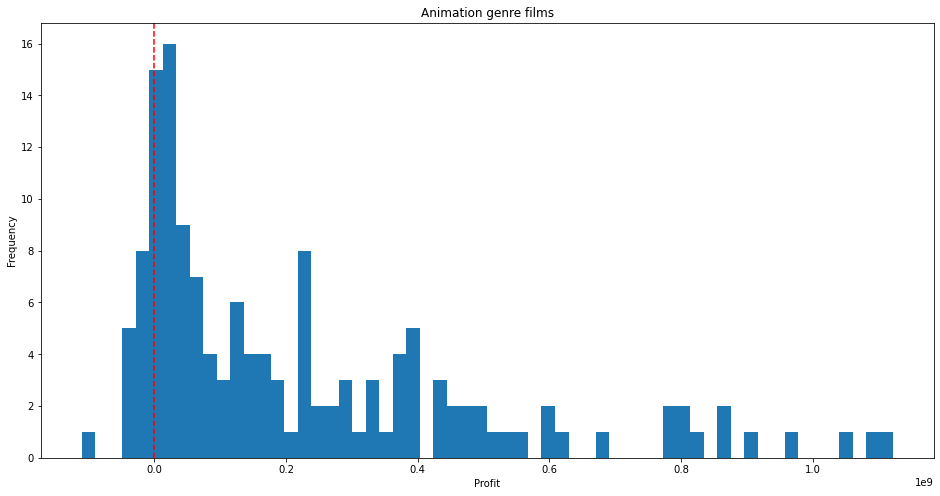

In [12]:
#explore difference in mean vs median by viewing distributions of top genres
animation_profit = mon_rat_gen.dropna(subset = ['genres', 'profit'])
animation_profit = animation_profit[animation_profit['genres'].str.contains('Animation')]
animation_profit = animation_profit.drop_duplicates(subset = ['movie_id'])
plt.figure(figsize = (16, 8))
plt.hist(animation_profit['profit'], bins = 60)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Animation genre films')
plt.show()

In [13]:
#finding the number of animated movies that lost money
neg_animation_profit = animation_profit.loc[animation_profit['profit'] < 0]
print(len(neg_animation_profit))
print(len(animation_profit))
print(len(neg_animation_profit) / len(animation_profit) *100)

24
143
16.783216783216783


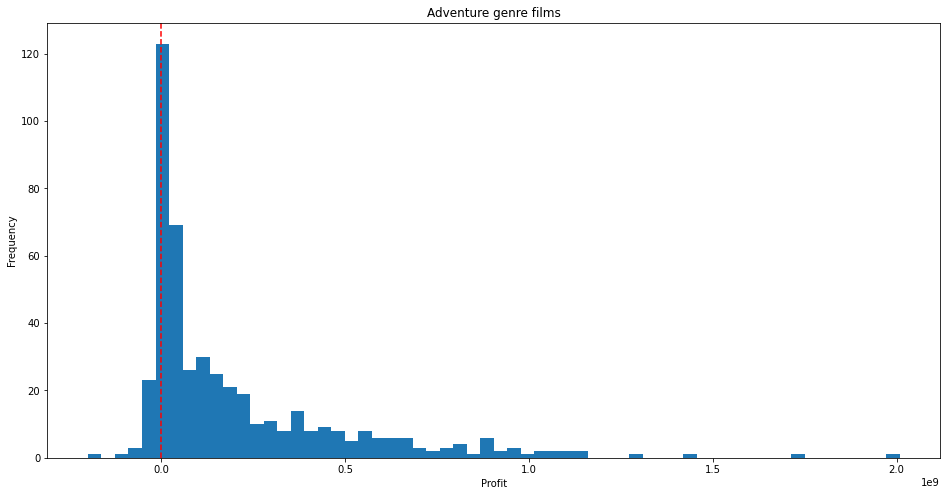

In [14]:
#process repeats for adventure genre
adventure_profit = mon_rat_gen.dropna(subset = ['genres', 'profit'])
adventure_profit = adventure_profit[adventure_profit['genres'].str.contains('Adventure')]
adventure_profit = adventure_profit.drop_duplicates(subset = ['movie_id'])
plt.figure(figsize = (16, 8))
plt.hist(adventure_profit['profit'], bins = 60)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Adventure genre films')
plt.show()

In [15]:
neg_adventure_profit = adventure_profit.loc[adventure_profit['profit'] < 0]
print(len(neg_adventure_profit))
print(len(adventure_profit))
print(len(neg_adventure_profit) / len(adventure_profit) *100)

105
477
22.0125786163522


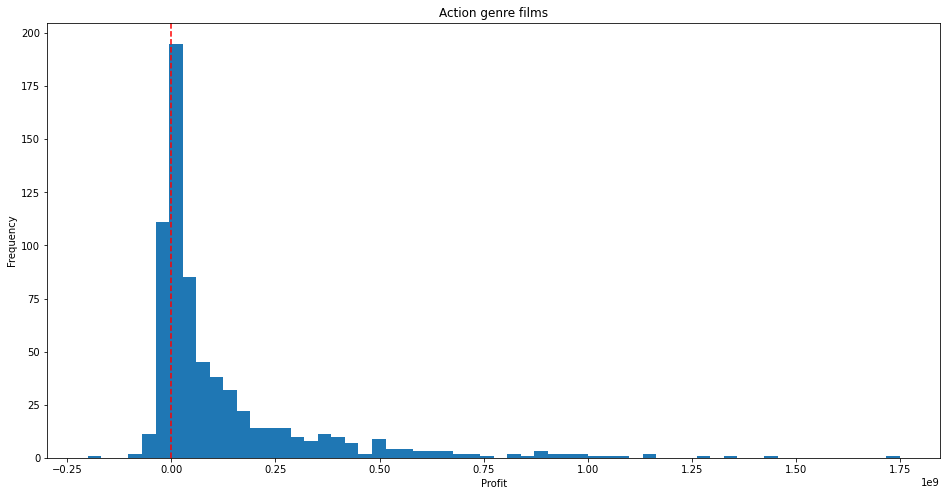

In [16]:
#process repeats for action genre
action_profit = mon_rat_gen.dropna(subset = ['genres', 'profit'])
action_profit = action_profit[action_profit['genres'].str.contains('Action')]
action_profit = action_profit.drop_duplicates(subset = ['movie_id'])
plt.figure(figsize = (16, 8))
plt.hist(action_profit['profit'], bins = 60)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Action genre films')
plt.show()

In [17]:
neg_action_profit = action_profit.loc[action_profit['profit'] < 0]
print(len(neg_action_profit))
print(len(action_profit))
print(len(neg_action_profit) / len(action_profit) *100)

215
684
31.432748538011694


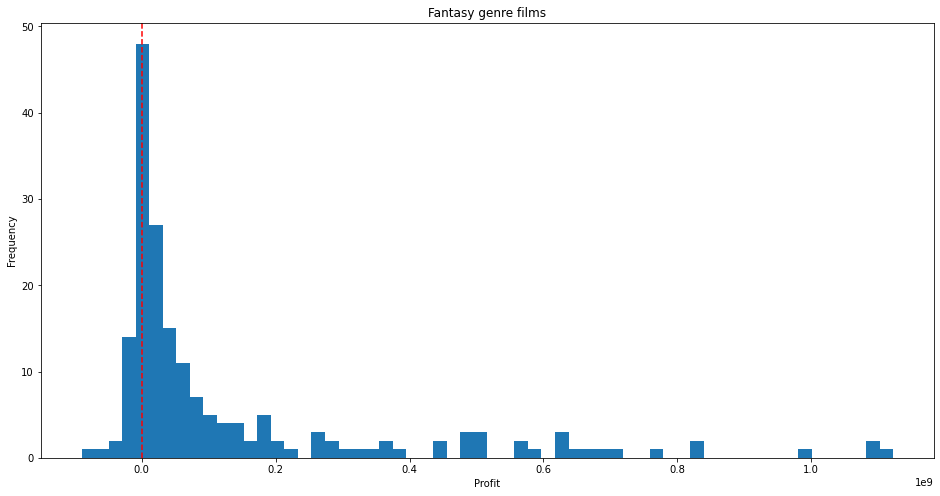

In [18]:
#process repeats for fantasy genre
fantasy_profit = mon_rat_gen.dropna(subset = ['genres', 'profit'])
fantasy_profit = fantasy_profit[fantasy_profit['genres'].str.contains('Fantasy')]
fantasy_profit = fantasy_profit.drop_duplicates(subset = ['movie_id'])
plt.figure(figsize = (16, 8))
plt.hist(fantasy_profit['profit'], bins = 60)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Fantasy genre films')
plt.show()

In [19]:
neg_fantasy_profit = fantasy_profit.loc[fantasy_profit['profit'] < 0]
print(len(neg_fantasy_profit))
print(len(fantasy_profit))
print(len(neg_fantasy_profit) / len(fantasy_profit) *100)

45
185
24.324324324324326


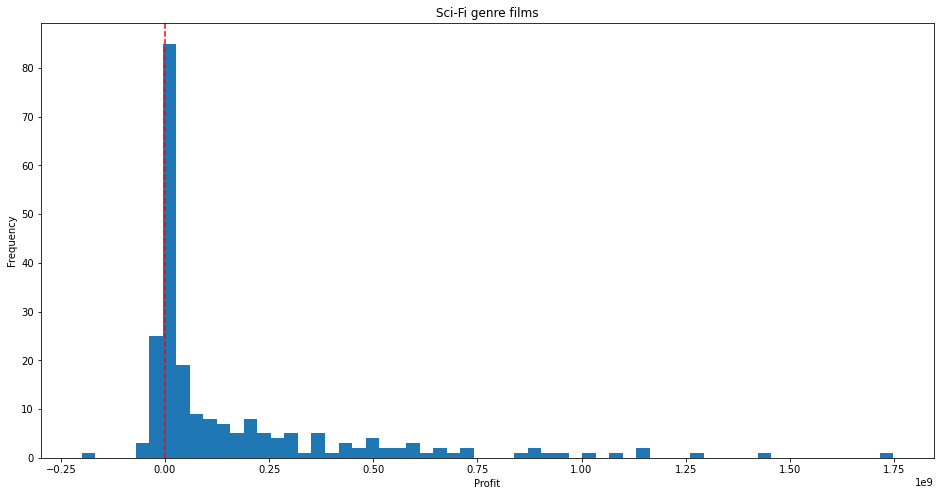

In [20]:
#process repeats for Sci-Fi genre
scifi_profit = mon_rat_gen.dropna(subset = ['genres', 'profit'])
scifi_profit = scifi_profit[scifi_profit['genres'].str.contains('Sci-Fi')]
scifi_profit = scifi_profit.drop_duplicates(subset = ['movie_id'])
plt.figure(figsize = (16, 8))
plt.hist(scifi_profit['profit'], bins = 60)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Sci-Fi genre films')
plt.show()

In [21]:
neg_scifi_profit = scifi_profit.loc[scifi_profit['profit'] < 0]
print(len(neg_scifi_profit))
print(len(scifi_profit))
print(len(neg_scifi_profit) / len(scifi_profit) *100)

79
225
35.11111111111111


Next find top directors by profit.

In [22]:
#create a profit v director DataFrame
prof_dir = mon_rat_gen.drop_duplicates(subset=['movie_id'])[['person_id', 'profit']]
prof_dir = prof_dir.dropna(subset = ['person_id'])

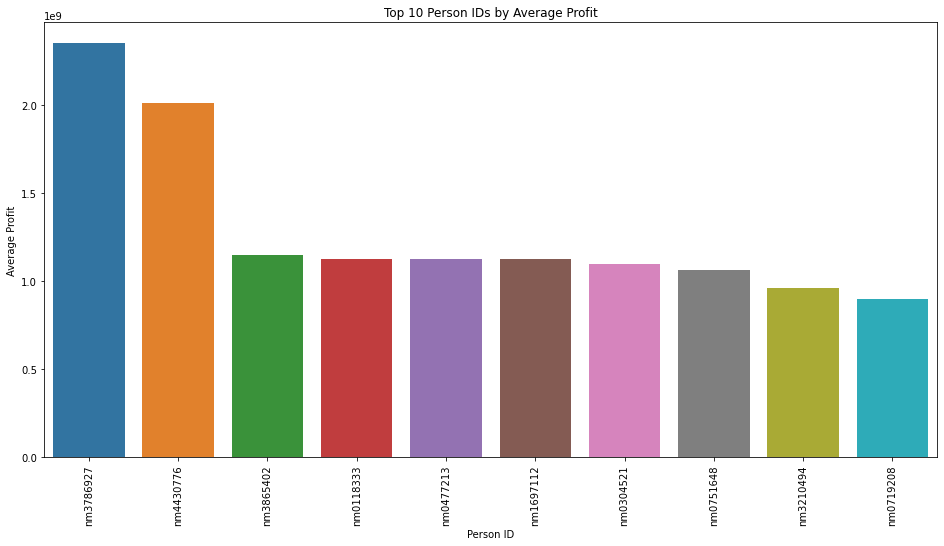

In [23]:
# visualizing top 10 directors by average profit per movie
person_profit = prof_dir.groupby('person_id').mean()
person_profit = person_profit.sort_values(by='profit', ascending=False)
plt.figure(figsize = (16, 8))
sns.barplot(x=person_profit.index[:10], y=person_profit.profit[:10])
plt.xlabel("Person ID")
plt.ylabel("Average Profit")
plt.title("Top 10 Person IDs by Average Profit")
plt.xticks(rotation=90)
plt.show()

Top result does not work in english, and has only directed 3 movies. We need to find a new approach to find repeatable performance.

In [24]:
#finding only directors with Action and Adventure experience
action_adventure_genres = mon_rat_gen.query("genres.str.contains('Action') & genres.str.contains('Adventure')")
action_adventure_directors = action_adventure_genres.groupby(['person_id'], as_index=False).mean()[['person_id','profit']]

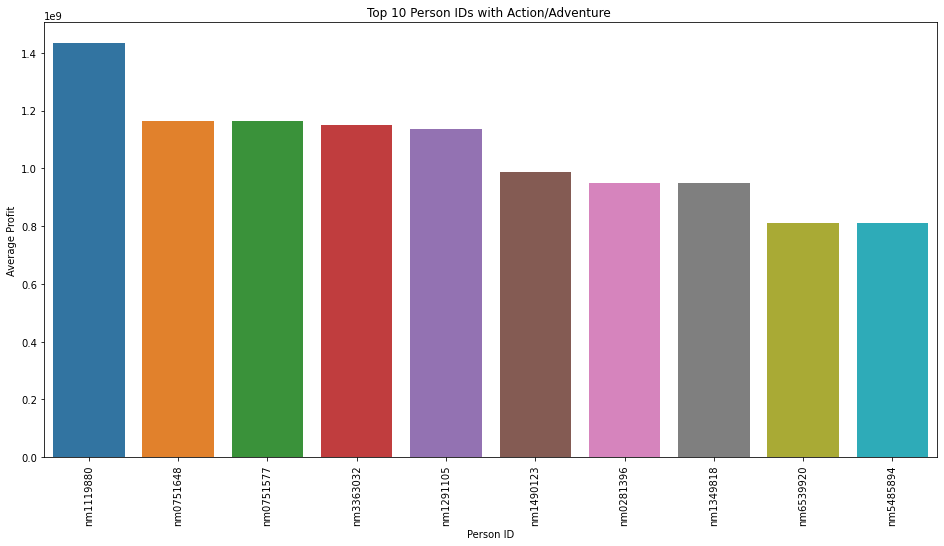

In [25]:
#visualizing the above
aa_profit = action_adventure_directors.groupby('person_id').mean()
aa_profit = aa_profit.sort_values(by = 'profit', ascending=False)
plt.figure(figsize = (16, 8))
sns.barplot(x = aa_profit.index[:10], y = aa_profit.profit[:10])
plt.xlabel("Person ID")
plt.ylabel("Average Profit")
plt.title("Top 10 Person IDs with Action/Adventure ")
plt.xticks(rotation=90)
plt.show()

Almost all results have blockbuster franchise movies.

In [26]:
#find the 10 most common directors in the top 10% of movies sorted by profit
most_common_ids = prof_dir.iloc[:320]['person_id'].value_counts().sort_values(ascending=False).head(n=10)
most_common_ids

nm1490123    4
nm0634240    4
nm1226871    3
nm0679031    3
nm0946734    3
nm0001741    3
nm0751648    3
nm0850733    3
nm0000881    3
nm0160840    3
Name: person_id, dtype: int64

Translating the person_ids through IMDB, these directors are:

James Wan, who has experience with animated, action and adventure movies.

Christopher Nolan, who has experience with action, adventure and sci-fi movies.

Jon M Chu, who has experience with action, adventure and sci-fi movies

Michael Bay, who has experience with animated, action, adventure and sci-fi movies.

Peter Jackson, who has experience with action, adventure and sci-fi movies.

David Yates, who has experience with action, adventure and fantasy movies.

Kenneth Branagh, who has experience with action, adventure and fantasy movies.

Mike Mitchell, who has experience with animation, action, adventure and sci-fi movies.

Francis Lawrence, who has experiece with action, adventure and sci-fi.

Steven Spielberg, who has experience with animation, action, adventure and sci-fi movies.

Recommend starting negotiations with these directors, starting with those that have animation experience.

Find the top languages by profit.

In [27]:
#create a DataFrame for mean profit vs language
prof_lan = mon_rat_gen.groupby(['language'])['profit'].mean().reset_index()
prof_lan = prof_lan.sort_values('profit', ascending=False)

In [28]:
#Translate language codes to languages
# note: 'qbn' is not a recognized iso 639 language code, assuming 'bn' is for Bengali
languages = {'qbn': 'Bengali','hi': 'Hindi','it': 'Italian','tr': 'Turkish','he': 'Hebrew','bg': 'Bulgarian','ca': 'Catalan','fr': 'French','sv': 'Swedish','pt': 'Portuguese','es': 'Spanish','en': 'English','cmn': 'Mandarin','de': 'German','id': 'Indonesian','hr': 'Croatian','nl': 'Dutch','fa': 'Persian','kn': 'Kannada','te': 'Telugu','ta': 'Tamil'}
prof_lan["language"] = prof_lan["language"].map(languages)

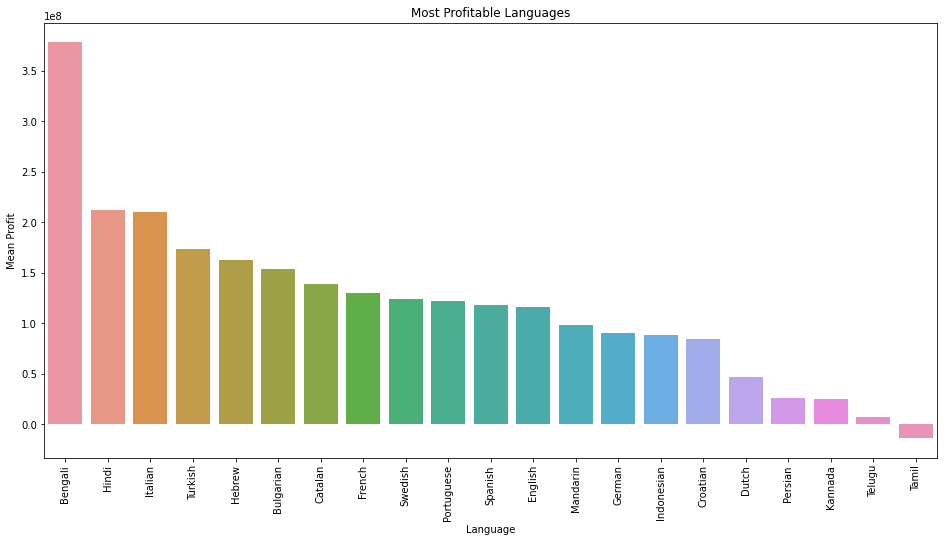

In [29]:
#visualize the above
plt.figure(figsize = (16, 8))
sns.barplot(x = prof_lan['language'], y = prof_lan['profit'])
plt.xlabel('Language')
plt.ylabel('Mean Profit')
plt.title('Most Profitable Languages')
plt.xticks(rotation = 90)
plt.show()

Use this to make sure any production is released in the top languages.